In [7]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
import time

In [8]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        self.regret = 0.  # Cumulative regret.
        self.regrets = [0.]  # History of cumulative regret.
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def update_regret(self, i):
        # i (int): index of the selected machine.
        np.random.seed(int(time.time()))
        probas = [np.random.random() for _ in range(i+1)]
        best_proba = max(probas)
        self.regret += best_proba - probas[i]
        self.regrets.append(self.regret)
    
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

            self.update_regret(i)
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

Eps-Decay

In [9]:
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        self.regret = 0.  # Cumulative regret.
        self.regrets = [0.]  # History of cumulative regret.
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def update_regret(self, i):
        # i (int): index of the selected machine.
        np.random.seed(int(time.time()))
        probas = [np.random.random() for _ in range(i+1)]
        best_proba = max(probas)
        self.regret += best_proba - probas[i]
        self.regrets.append(self.regret)
    
    
    
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

            self.update_regret(i)
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

UCB

In [10]:

class ucb_bandit:
    '''
    Upper Confidence Bound Bandit
    
    Inputs 
    ============================================
    k: number of arms (int)
    c:
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        self.regret = 0.  # Cumulative regret.
        self.regrets = [0.]  # History of cumulative regret.
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def update_regret(self, i):
        # i (int): index of the selected machine.
        np.random.seed(int(time.time()))
        probas = [np.random.random() for _ in range(i+1)]
        best_proba = max(probas)
        self.regret += best_proba - probas[i]
        self.regrets.append(self.regret)
        
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt(
                (np.log(self.n)) / self.k_n))
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

            self.update_regret(i)
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)
        
        self.regret = 0.
        self.regrets = [0.]

(2-c)

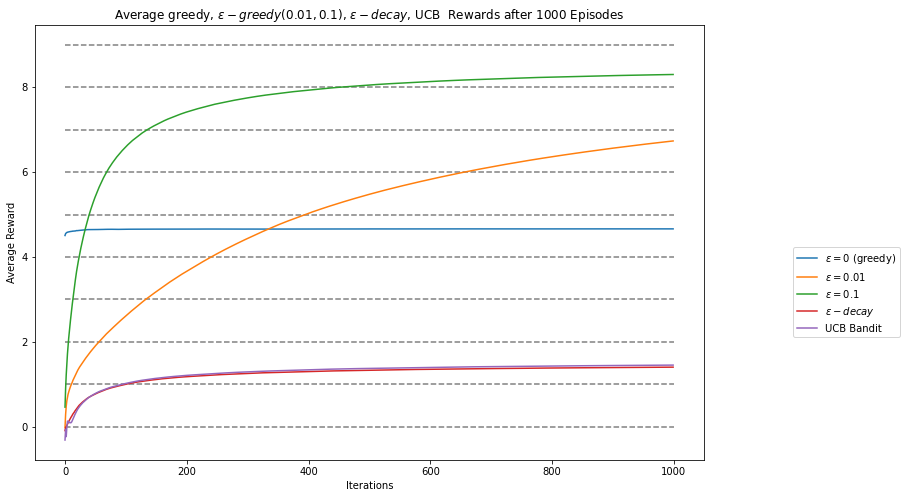

In [11]:
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

eps_decay_rewards = np.zeros(iters)
ucb_rewards = np.zeros(iters)
ucb = ucb_bandit(k, 2, iters)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    eps_decay = eps_decay_bandit(k, iters)
    ucb.reset()
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    eps_decay.run()
    ucb.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    ucb_rewards += (ucb.reward  - ucb_rewards) / (i + 1)

   
    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(ucb_rewards, label='UCB Bandit')
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average greedy, $\epsilon-greedy (0.01, 0.1)$, $\epsilon-decay$, UCB  Rewards after " + 
     str(episodes) + " Episodes")
plt.show()



(2-d) Histogram

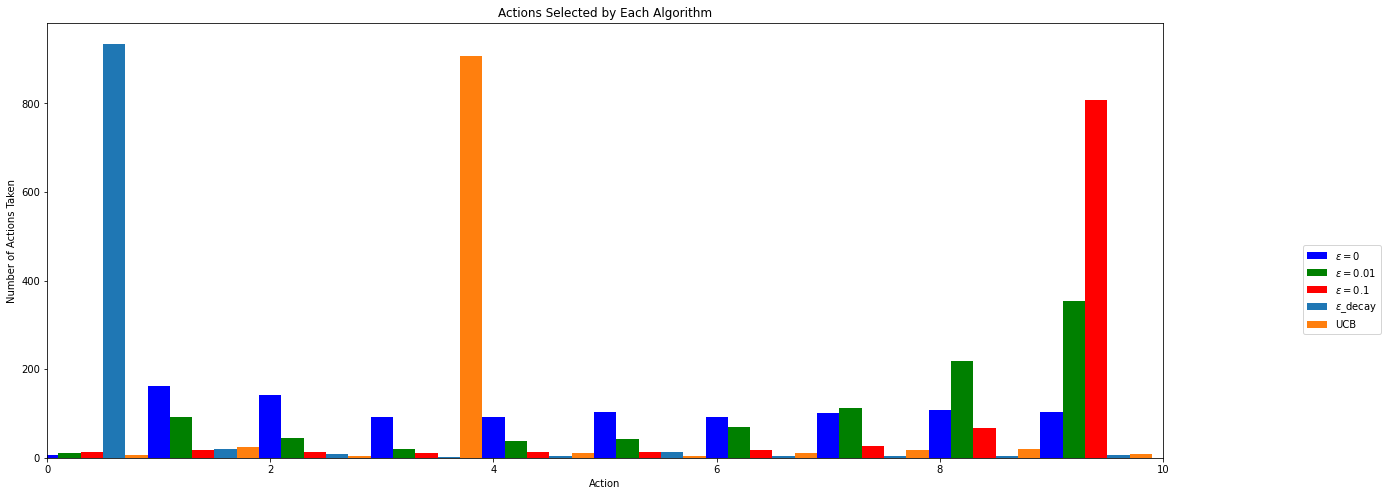

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.5839,16.1205,14.0956,9.2000,9.1000,10.3000,9.3000,10.2000,10.7000,10.4000
$\epsilon=0.01$,1.0071,9.1969,4.4148,1.9982,3.8729,4.2389,6.8964,11.1975,21.7455,35.4318
$\epsilon=0.1$,1.2836,1.6932,1.2942,1.1771,1.2757,1.3939,1.6820,2.6765,6.7268,80.7970
$\epsilon_decay$,93.5000,2.0000,0.8000,0.1000,0.4000,1.2000,0.5000,0.4000,0.4000,0.7000
$ucb$,0.6000,2.4000,0.4000,90.7000,1.1000,0.4000,1.0000,1.7000,1.9000,0.8000


In [12]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(20,8))
plt.bar(bins, eps_0_selection, 
        width = 0.2, color='b', 
        label="$\epsilon=0$")
plt.bar(bins+0.2, eps_01_selection,
        width=0.2, color='g', 
        label="$\epsilon=0.01$")
plt.bar(bins+0.4, eps_1_selection, 
        width=0.2, color='r',
        label="$\epsilon=0.1$")
plt.bar(bins+0.6, eps_decay.k_n,
        width=0.2, 
        label="$\epsilon$_decay")
plt.bar(bins+0.8, ucb.k_n,
        width=0.2, 
        label="UCB")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection,
                   eps_1_selection, eps_decay.k_n, ucb.k_n]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', 
    '$\epsilon=0.01$', '$\epsilon=0.1$','$\epsilon_decay$', '$ucb$'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

(2-e) Plot the average regret as a function of time for each algorithm

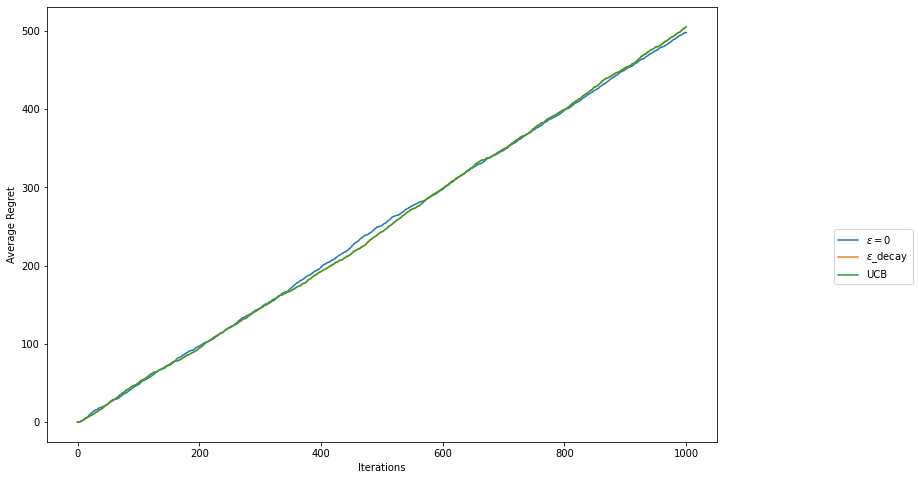

In [13]:

plt.figure(figsize=(12,8))
plt.plot(range(len(eps_0.regrets)), eps_0.regrets,label="$\epsilon=0$")
plt.plot(range(len(eps_decay.regrets)), eps_decay.regrets,label="$\epsilon$_decay")
plt.plot(range(len(ucb.regrets)), ucb.regrets,label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Regret")
plt.show()

(2-f) *From the above plots, reason out which of the above bandit algorithm is better*

By looking at the line graph of Average_rewards, the ϵ-greedy (0.1) is better with the best Average_reward overall compare to others.The optimal action using ϵ-greedy (0.1) was a=9 which had an average reward of 8. The ϵ-greedy (0.1) algorithm was not selected often (histogram). Additionally, you’ll see that the greedy algorithm chose the negative values much more often than the UCB

(2-g) Repeat the above analysis for the scenario when the mean rewards of the second best armand the best arm are close

From the Histogram, I see that Greedy and UCB are the first and second best chossen bandits.
Below is the Analysis

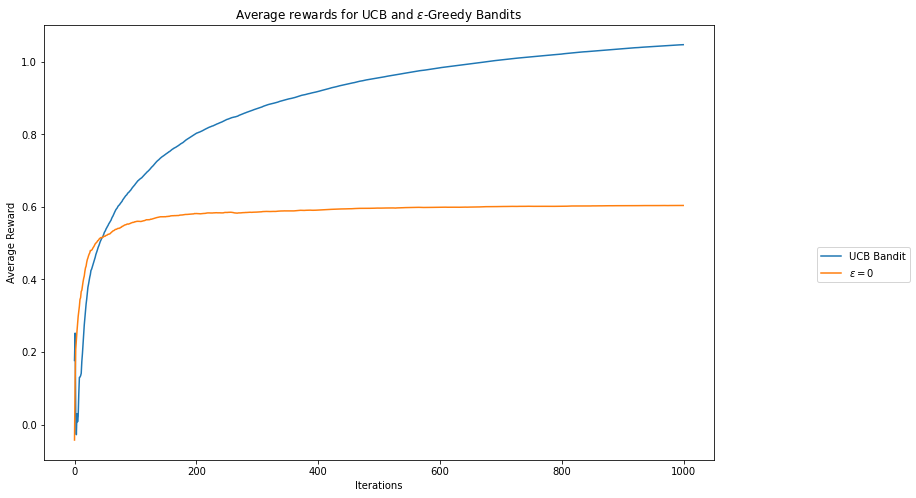

In [15]:
k = 10
iters = 1000
eps_rewards = np.zeros(iters)
ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters)
eps_greedy = eps_bandit(k, 0, iters, ucb.mu.copy())
episodes = 1000
# Run experiments
for i in range(episodes):
    ucb.reset()
    eps_greedy.reset()
# Run experiments
    ucb.run()
    eps_greedy.run()
    
    # Update long-term averages
    ucb_rewards += (ucb.reward  - ucb_rewards) / (i + 1)
    eps_rewards += (eps_greedy.reward - eps_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(ucb_rewards, label='UCB Bandit')
plt.plot(eps_rewards, label="$\epsilon={}$".format(
    eps_greedy.eps))
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average rewards for UCB and $\epsilon$-Greedy Bandits")
plt.show()

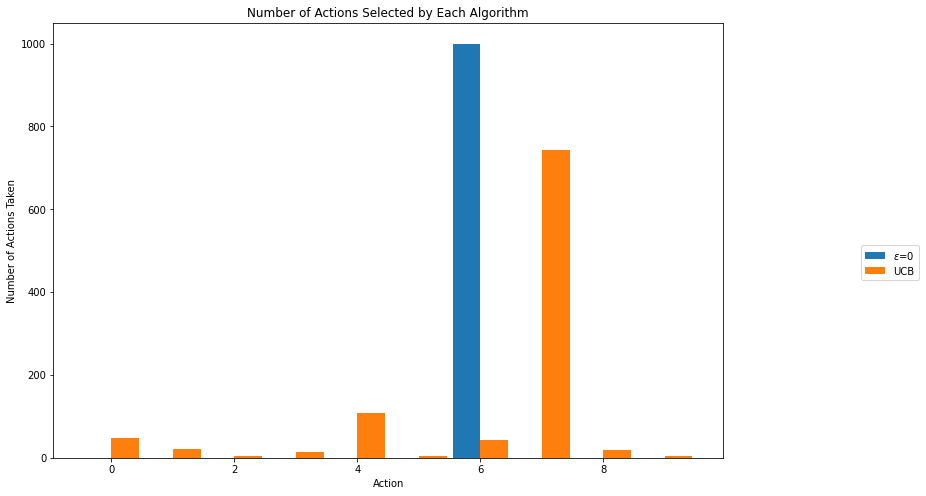

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
Greedy,0.00,0.00,0.00,0.00,0.00,0.0,100.00,0.00,0.00,0.00
UCB,4.70,2.10,0.50,1.40,10.90,0.4,4.20,74.40,1.90,0.50
Expected Reward,0.29,0.46,-1.42,0.13,0.85,-1.0,0.55,1.21,-0.03,-0.95


In [20]:
width = 0.45
bins = np.linspace(0, k-1, k) - width/2
plt.figure(figsize=(12,8))
plt.bar(bins, eps_greedy.k_n,
        width=width, 
        label="$\epsilon$={}".format(eps_greedy.eps))
plt.bar(bins+0.45, ucb.k_n,
        width=width, 
        label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.title("Number of Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()
opt_per = np.array([eps_greedy.k_n, ucb.k_n]) / iters * 100
df = pd.DataFrame(np.vstack(
    [opt_per.round(1), 
    eps_greedy.mu.reshape(-1, 1).T.round(2)]), 
        index=["Greedy", "UCB", "Expected Reward"],
        columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df